## Sales Data Analysis and Reporting for a Retail Chain Project

project Plan

The aim of this project is to use Python, SQL, and Excel to analyze sales 
data and generate meaningful reports for a retail chain.

Phase 1: Data Collection and Database Setup
1. Data Collection: Download the data from Kaggle as a csv file 
2. Database Setup


Phase 2: Data Cleaning and Preparation
1. Data Cleaning:  Python (pandas) to clean the 
data. Look for and handle missing or inconsistent data, outliers, etc.
2. Data Preparation: Prepare the data for analysis.


 Phase 3: Data Analysis
1. Data Exploration:  Python (pandas, matplotlib, 
seaborn, etc) to explore the data and identify trends and patterns.
2. Advanced Analysis: Perform more complex analysis as needed. For 
example, time series analysis for sales trends, cohort analysis for 
customer behavior, etc. Python's advanced data analysis libraries can 
be very useful here.

## 1. Data Cleaning and Preparation

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go

In [107]:
# Load data
df = pd.read_csv("C:/Users/DELL/Downloads/Sales-Data-Analysis-and-Reporting-for-a-Retail-Chain-main/Transactions.csv")
response = pd.read_csv("C:/Users/DELL/Downloads/Sales-Data-Analysis-and-Reporting-for-a-Retail-Chain-main/Response.csv")


In [108]:
# Merging both the tables
df = df.merge(response, on='customer_id', how='left')

In [109]:
# Data Inspection
print(df.dtypes)



customer_id    object
trans_date     object
response        int64
month           int64
tran_amount     int64
month_year     object
recency        object
frequency       int64
monetary        int64
Segment        object
dtype: object


In [110]:
print(df.shape)


(124969, 10)


In [111]:
print(df.head())


  customer_id  trans_date  response  month  tran_amount month_year  \
0      CS5295   2/11/2013         1      2           35    2013-02   
1      CS4768   3/15/2015         1      3           39    2015-03   
2      CS2122   2/26/2013         0      2           52    2013-02   
3      CS1217  11/16/2011         0     11           99    2011-11   
4      CS1850  11/20/2013         0     11           78    2013-11   

      recency  frequency  monetary Segment  
0  11/25/2014         25      1637      P0  
1   3/15/2015         26      1721      P0  
2   2/23/2015         23      1648      P0  
3  12/29/2014         20      1431      P0  
4    3/9/2015         24      1908      P0  


In [112]:
print(df.tail())


       customer_id  trans_date  response  month  tran_amount month_year  \
124964      CS8433   6/26/2011         0      6           64    2011-06   
124965      CS7232   8/19/2014         0      8           38    2014-08   
124966      CS8731  11/28/2014         0     11           42    2014-11   
124967      CS8133  12/14/2013         0     12           13    2013-12   
124968      CS7996  12/13/2014         0     12           36    2014-12   

           recency  frequency  monetary Segment  
124964  12/30/2014         20       960      P2  
124965    9/1/2014         12       498      P2  
124966   2/28/2015         15       654      P2  
124967  12/20/2014         12       509      P2  
124968  12/13/2014         19       851      P2  


In [113]:
print(df.describe())


            response          month    tran_amount      frequency  \
count  124969.000000  124969.000000  124969.000000  124969.000000   
mean        0.110763       6.631725      64.995143      19.633965   
std         0.313840       3.475188      22.860059       5.049131   
min         0.000000       1.000000      10.000000       4.000000   
25%         0.000000       4.000000      47.000000      16.000000   
50%         0.000000       7.000000      65.000000      20.000000   
75%         0.000000      10.000000      83.000000      23.000000   
max         1.000000      12.000000     105.000000      39.000000   

            monetary  
count  124969.000000  
mean     1304.083469  
std       451.029447  
min       149.000000  
25%      1008.000000  
50%      1351.000000  
75%      1624.000000  
max      2933.000000  


In [114]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124969 entries, 0 to 124968
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  124969 non-null  object
 1   trans_date   124969 non-null  object
 2   response     124969 non-null  int64 
 3   month        124969 non-null  int64 
 4   tran_amount  124969 non-null  int64 
 5   month_year   124969 non-null  object
 6   recency      124969 non-null  object
 7   frequency    124969 non-null  int64 
 8   monetary     124969 non-null  int64 
 9   Segment      124969 non-null  object
dtypes: int64(5), object(5)
memory usage: 9.5+ MB
None


In [115]:
print(df.isnull().sum())

customer_id    0
trans_date     0
response       0
month          0
tran_amount    0
month_year     0
recency        0
frequency      0
monetary       0
Segment        0
dtype: int64


In [116]:
df.columns

Index(['customer_id', 'trans_date', 'response', 'month', 'tran_amount',
       'month_year', 'recency', 'frequency', 'monetary', 'Segment'],
      dtype='object')

In [117]:
response.columns

Index(['customer_id', 'recency', 'frequency', 'monetary', 'Segment'], dtype='object')

In [118]:
print(df.columns.tolist())


['customer_id', 'trans_date', 'response', 'month', 'tran_amount', 'month_year', 'recency', 'frequency', 'monetary', 'Segment']


In [119]:
df['response'] = df.get('response', 'no_response')


In [120]:
# used describe() for specific columns
df[['tran_amount']].describe()

tran_amount
count  124969.000000
mean       64.995143
std        22.860059
min        10.000000
25%        47.000000
50%        65.000000
75%        83.000000
max       105.000000

In [121]:
#Removing rows with missing values
df = df.dropna()
df

customer_id  trans_date  response  month  tran_amount month_year  \
0           CS5295   2/11/2013         1      2           35    2013-02   
1           CS4768   3/15/2015         1      3           39    2015-03   
2           CS2122   2/26/2013         0      2           52    2013-02   
3           CS1217  11/16/2011         0     11           99    2011-11   
4           CS1850  11/20/2013         0     11           78    2013-11   
...            ...         ...       ...    ...          ...        ...   
124964      CS8433   6/26/2011         0      6           64    2011-06   
124965      CS7232   8/19/2014         0      8           38    2014-08   
124966      CS8731  11/28/2014         0     11           42    2014-11   
124967      CS8133  12/14/2013         0     12           13    2013-12   
124968      CS7996  12/13/2014         0     12           36    2014-12   

           recency  frequency  monetary Segment  
0       11/25/2014         25      1637      P0  
1        3/15/2015         26      1721      P0  
2        2/23/2015         23      1648      P0  
3       12/29/2014         20      1431      P0  
4         3/9/2015         24      1908      P0  
...            ...        ...       ...     ...  
124964  12/30/2014         20       960      P2  
124965    9/1/2014         12       498      P2  
124966   2/28/2015         15       654      P2  
124967  12/20/2014         12       509      P2  
124968  12/13/2014         19       851      P2  

[124969 rows x 10 columns]

In [122]:
# Change Data Types
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['response'] = df['response'].astype('int64')

In [123]:
df

customer_id trans_date  response  month  tran_amount month_year  \
0           CS5295 2013-02-11         1      2           35    2013-02   
1           CS4768 2015-03-15         1      3           39    2015-03   
2           CS2122 2013-02-26         0      2           52    2013-02   
3           CS1217 2011-11-16         0     11           99    2011-11   
4           CS1850 2013-11-20         0     11           78    2013-11   
...            ...        ...       ...    ...          ...        ...   
124964      CS8433 2011-06-26         0      6           64    2011-06   
124965      CS7232 2014-08-19         0      8           38    2014-08   
124966      CS8731 2014-11-28         0     11           42    2014-11   
124967      CS8133 2013-12-14         0     12           13    2013-12   
124968      CS7996 2014-12-13         0     12           36    2014-12   

           recency  frequency  monetary Segment  
0       11/25/2014         25      1637      P0  
1        3/15/2015         26      1721      P0  
2        2/23/2015         23      1648      P0  
3       12/29/2014         20      1431      P0  
4         3/9/2015         24      1908      P0  
...            ...        ...       ...     ...  
124964  12/30/2014         20       960      P2  
124965    9/1/2014         12       498      P2  
124966   2/28/2015         15       654      P2  
124967  12/20/2014         12       509      P2  
124968  12/13/2014         19       851      P2  

[124969 rows x 10 columns]

In [124]:
set(df['response'])

{0, 1}

In [125]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
response                int64
month                   int64
tran_amount             int64
month_year             object
recency                object
frequency               int64
monetary                int64
Segment                object
dtype: object

In [126]:
df['tran_amount'].std()

22.860058562401992

In [127]:
df['tran_amount'].sum()

8122378

In [128]:
df['tran_amount'].mean()

64.99514279541326

In [129]:
# Checking for Outliers using Z-score
z_scores_tran_amount = np.abs(stats.zscore(df['tran_amount']))
z_scores_response = np.abs(stats.zscore(df['response']))

In [130]:
threshold = 3
outliers_tran_amount = z_scores_tran_amount > threshold
outliers_response = z_scores_response > threshold

In [131]:
df[outliers_tran_amount]

Empty DataFrame
Columns: [customer_id, trans_date, response, month, tran_amount, month_year, recency, frequency, monetary, Segment]
Index: []

In [132]:
print(df[outliers_response])

Empty DataFrame
Columns: [customer_id, trans_date, response, month, tran_amount, month_year, recency, frequency, monetary, Segment]
Index: []


In [174]:
print(df['response'].unique())


[1 0]


In [175]:
df['response'] = pd.to_numeric(df['response'], errors='coerce')


C:\Users\DELL\AppData\Local\Temp\ipykernel_3368\1220311645.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




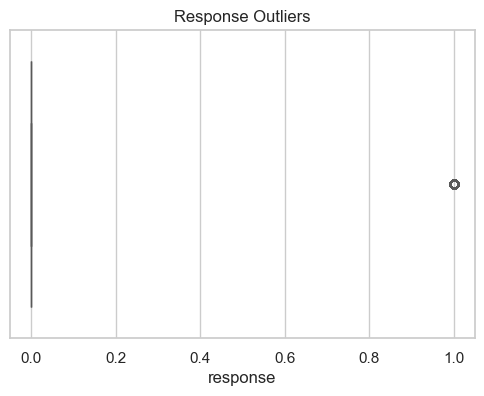

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['response'], palette="Set2")
plt.title('Response Outliers')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_3368\394446528.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




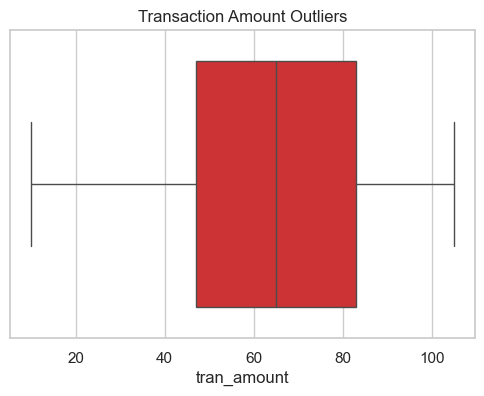

In [134]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['tran_amount'], palette="Set1")
plt.title('Transaction Amount Outliers')
plt.show()

In [135]:
# Creating New Columns
df['month'] = df['trans_date'].dt.month

In [136]:
# Daily Sales
daily_sales = df.groupby(['customer_id', 'trans_date'])['tran_amount'].sum().reset_index()

In [137]:
# Weekly Sales 
weekly_sales = df.set_index('trans_date').resample('W')['tran_amount'].sum().reset_index()


In [138]:
# Top 3 Months by Transaction Amount
monthly_sales = df.groupby('month')['tran_amount'].sum()
monthly_sales = monthly_sales.sort_values(ascending=False).reset_index().head(3)
print(monthly_sales)

   month  tran_amount
0      8       726775
1     10       725058
2      1       724089


In [139]:
# Customer with Highest Number of Orders
customer_counts = df['customer_id'].value_counts().reset_index()
customer_counts.columns = ['customer_id', 'counts']
top_5_cust = customer_counts.sort_values(by='counts', ascending=False).head(5)


In [140]:
#customer having highest value of orders.

customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

#top 5 customers

top_5_sal = customer_sales.sort_values(by='tran_amount', ascending = False).head(5)
top_5_sal


customer_id  tran_amount
3312      CS4424         2933
3208      CS4320         2647
4640      CS5752         2612
3548      CS4660         2527
2687      CS3799         2513

In [141]:
# Barplot for Top 5 Customers by Order Count
fig = px.bar(top_5_cust, x='customer_id', y='counts', color='counts', title="Top 5 Customers by Order Count")
fig.show()

In [142]:
# Customer with Highest Value of Orders
customer_sales = df.groupby('customer_id')['tran_amount'].sum().reset_index()
top_5_sal = customer_sales.sort_values(by='tran_amount', ascending=False).head(5)


In [143]:
# Barplot for Top 5 Customers by Sales Value
fig = px.bar(top_5_sal, x='customer_id', y='tran_amount', color='tran_amount', title="Top 5 Customers by Sales Value")
fig.show()

# Data Analysis

### Advanced Analytics 

### Time Series Analysis

In [144]:
# Advanced Analytics Time Series Analysis
df['month_year'] = df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()

In [145]:
df

customer_id trans_date  response  month  tran_amount month_year  \
0           CS5295 2013-02-11         1      2           35    2013-02   
1           CS4768 2015-03-15         1      3           39    2015-03   
2           CS2122 2013-02-26         0      2           52    2013-02   
3           CS1217 2011-11-16         0     11           99    2011-11   
4           CS1850 2013-11-20         0     11           78    2013-11   
...            ...        ...       ...    ...          ...        ...   
124964      CS8433 2011-06-26         0      6           64    2011-06   
124965      CS7232 2014-08-19         0      8           38    2014-08   
124966      CS8731 2014-11-28         0     11           42    2014-11   
124967      CS8133 2013-12-14         0     12           13    2013-12   
124968      CS7996 2014-12-13         0     12           36    2014-12   

           recency  frequency  monetary Segment  
0       11/25/2014         25      1637      P0  
1        3/15/2015         26      1721      P0  
2        2/23/2015         23      1648      P0  
3       12/29/2014         20      1431      P0  
4         3/9/2015         24      1908      P0  
...            ...        ...       ...     ...  
124964  12/30/2014         20       960      P2  
124965    9/1/2014         12       498      P2  
124966   2/28/2015         15       654      P2  
124967  12/20/2014         12       509      P2  
124968  12/13/2014         19       851      P2  

[124969 rows x 10 columns]

In [146]:
monthly_sales.index = pd.to_datetime(monthly_sales.index)


In [147]:
# Plotting Monthly Sales
fig = px.line(x=monthly_sales.index, y=monthly_sales.values, labels={'x': 'Month-Year', 'y': 'Sales'}, title='Monthly Sales')
fig.update_layout(xaxis=dict(tickformat="%Y-%m"))
fig.show()

### Cohort Segmentation

In [148]:
#Recency
recency = df.groupby('customer_id')['trans_date'].max()
recency

# Sorted the data by customer_id and trans_date
data_sorted = df.sort_values(['customer_id', 'trans_date'])
data_sorted

## Calculate recency for each customer
data_sorted['recency'] = data_sorted.groupby('customer_id')['trans_date'].diff().dt.days
data_sorted

#frequncy
frequncy = df.groupby('customer_id')['trans_date'].count()
frequncy

#Monetary (CMV) 
monetary = df.groupby('customer_id')['tran_amount'].sum()
monetary

#combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequncy,'monetary':monetary})
rfm


recency  frequency  monetary
customer_id                                
CS1112      2015-01-14         15      1012
CS1113      2015-02-09         20      1490
CS1114      2015-02-12         19      1432
CS1115      2015-03-05         22      1659
CS1116      2014-08-25         13       857
...                ...        ...       ...
CS8996      2014-12-09         13       582
CS8997      2014-06-28         14       543
CS8998      2014-12-22         13       624
CS8999      2014-07-02         12       383
CS9000      2015-02-28         13       533

[6884 rows x 3 columns]

In [149]:
# Customer Segmentation
def segment_customer(row):
    if row['recency'] and row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (row['recency'].year < 2012 and row['recency'].year >= 2011) and (row['frequency'] < 15 and row['frequency'] > 10) and (row['monetary'] <= 1000 and row['monetary'] >= 500):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
print(set(rfm['Segment']))


{'P0', 'P2'}


In [150]:
rfm

recency  frequency  monetary Segment
customer_id                                        
CS1112      2015-01-14         15      1012      P0
CS1113      2015-02-09         20      1490      P0
CS1114      2015-02-12         19      1432      P0
CS1115      2015-03-05         22      1659      P0
CS1116      2014-08-25         13       857      P2
...                ...        ...       ...     ...
CS8996      2014-12-09         13       582      P2
CS8997      2014-06-28         14       543      P2
CS8998      2014-12-22         13       624      P2
CS8999      2014-07-02         12       383      P2
CS9000      2015-02-28         13       533      P2

[6884 rows x 4 columns]

In [151]:
set(rfm['Segment'])

{'P0', 'P2'}

### Churn Analysis 

In [152]:
# Churn Analysis
churn_counts = df['response'].value_counts()

In [153]:
# Bar Plot for Churn Counts
fig = px.bar(churn_counts, x=churn_counts.index, y=churn_counts.values, labels={'index': 'Response', 'y': 'Count'}, title="Churn Counts")
fig.show()

### Analyzing Top Customers 

In [154]:
# Analyzing Top Customers
top_5_customers = monetary.sort_values(ascending=False).head(5).index
top_customers_df = df[df['customer_id'].isin(top_5_customers)]
top_customers_sales = top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)


array([[<Axes: title={'center': 'trans_date'}>,
        <Axes: title={'center': 'response'}>],
       [<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'tran_amount'}>],
       [<Axes: title={'center': 'frequency'}>,
        <Axes: title={'center': 'monetary'}>]], dtype=object)

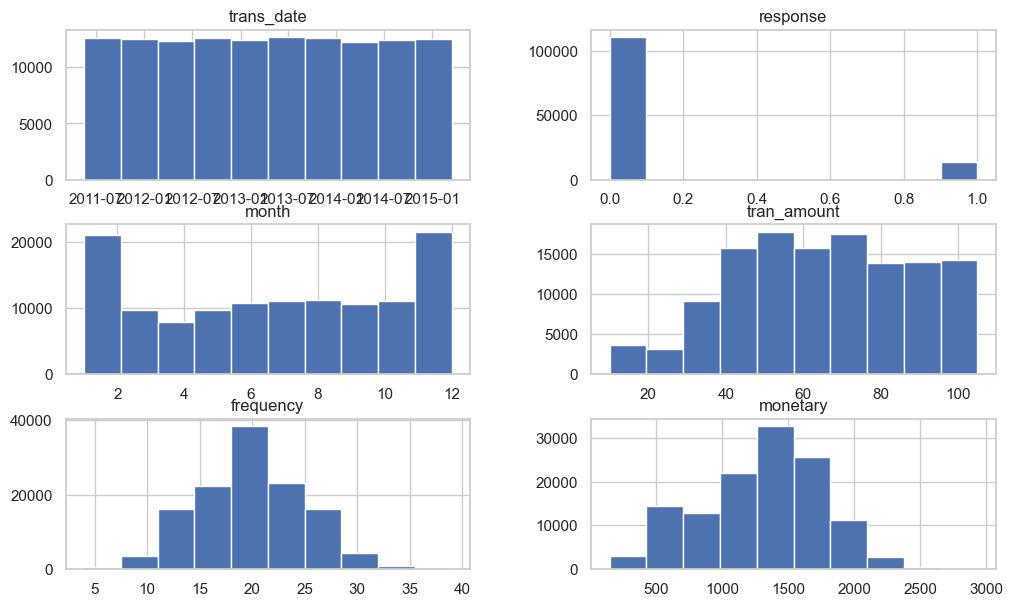

In [155]:
#Analysis using hist plot

import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(12,7))

In [170]:
# Convert 'month_year' to a timestamp
top_customers_sales.index = top_customers_sales.index.to_timestamp()

# Line Plot for Top 5 Customers' Monthly Sales
fig = px.line(top_customers_sales, labels={'index': 'Month-Year', 'value': 'Sales'}, title="Top 5 Customers' Monthly Sales")
fig.show()


In [157]:
# Analysis using Hist Plot
fig = px.histogram(df, x='tran_amount', nbins=20, title="Transaction Amount Distribution")
fig.show()


In [158]:
# Monthly Response Analysis
cross_tab = pd.crosstab(df['month'], df['response'])

<Figure size 100x200 with 0 Axes>

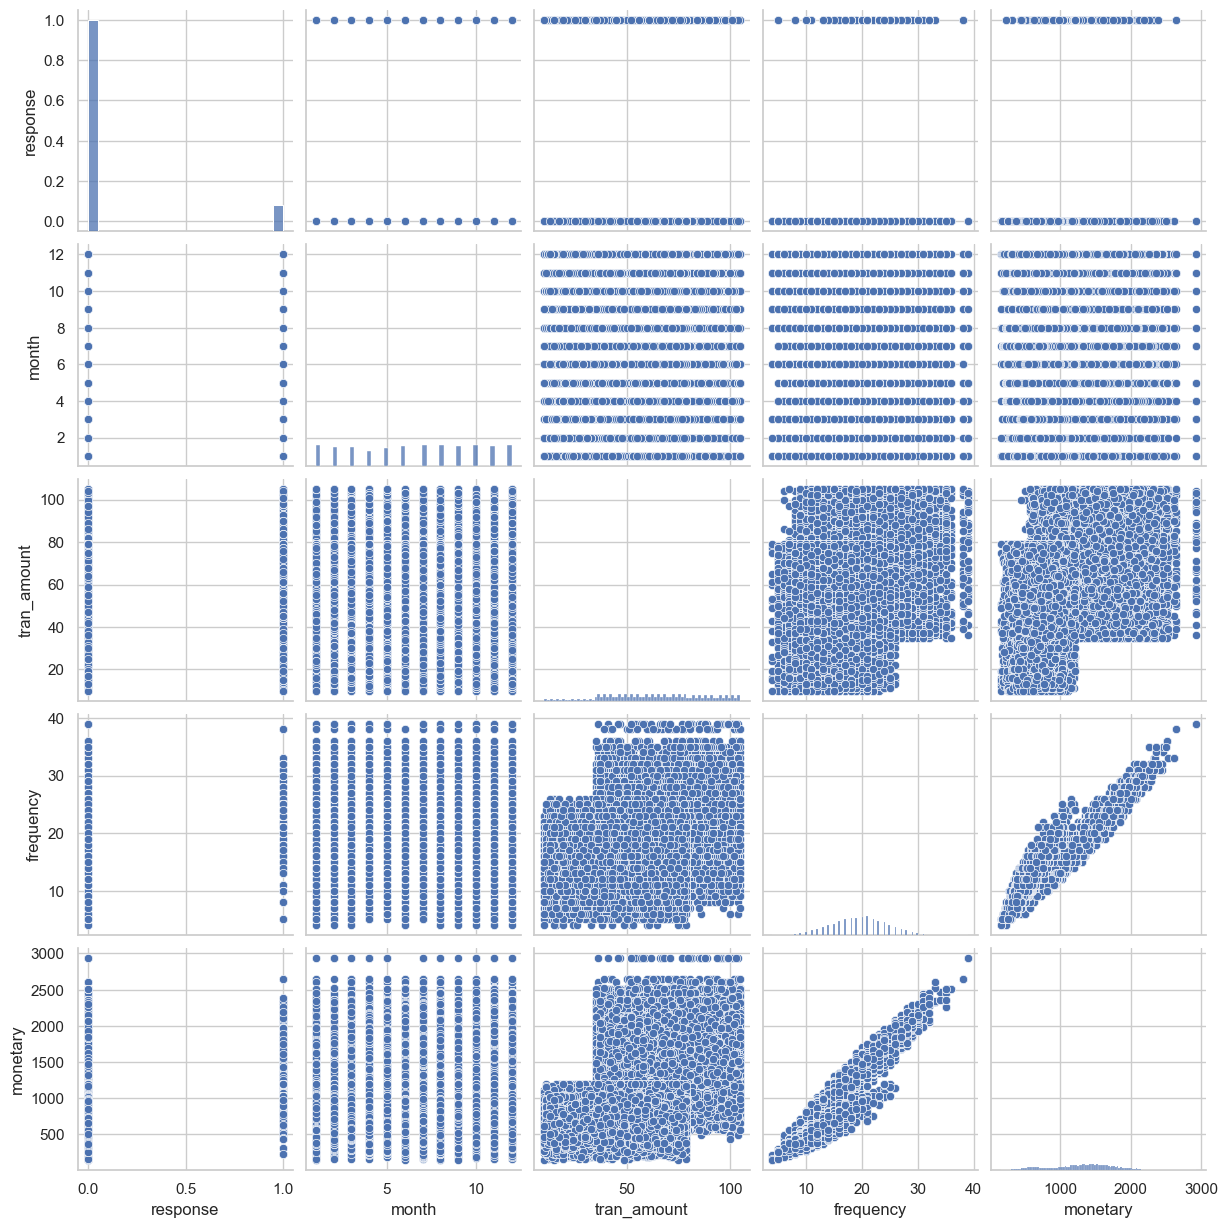

In [159]:
plt.figure(figsize=(1, 2))
sns.pairplot(df)

In [160]:
# Bar Plot for Monthly Responses
fig = px.bar(df, x='month', color='response', barmode='group', title="Count of Responses by Month")
fig.show()

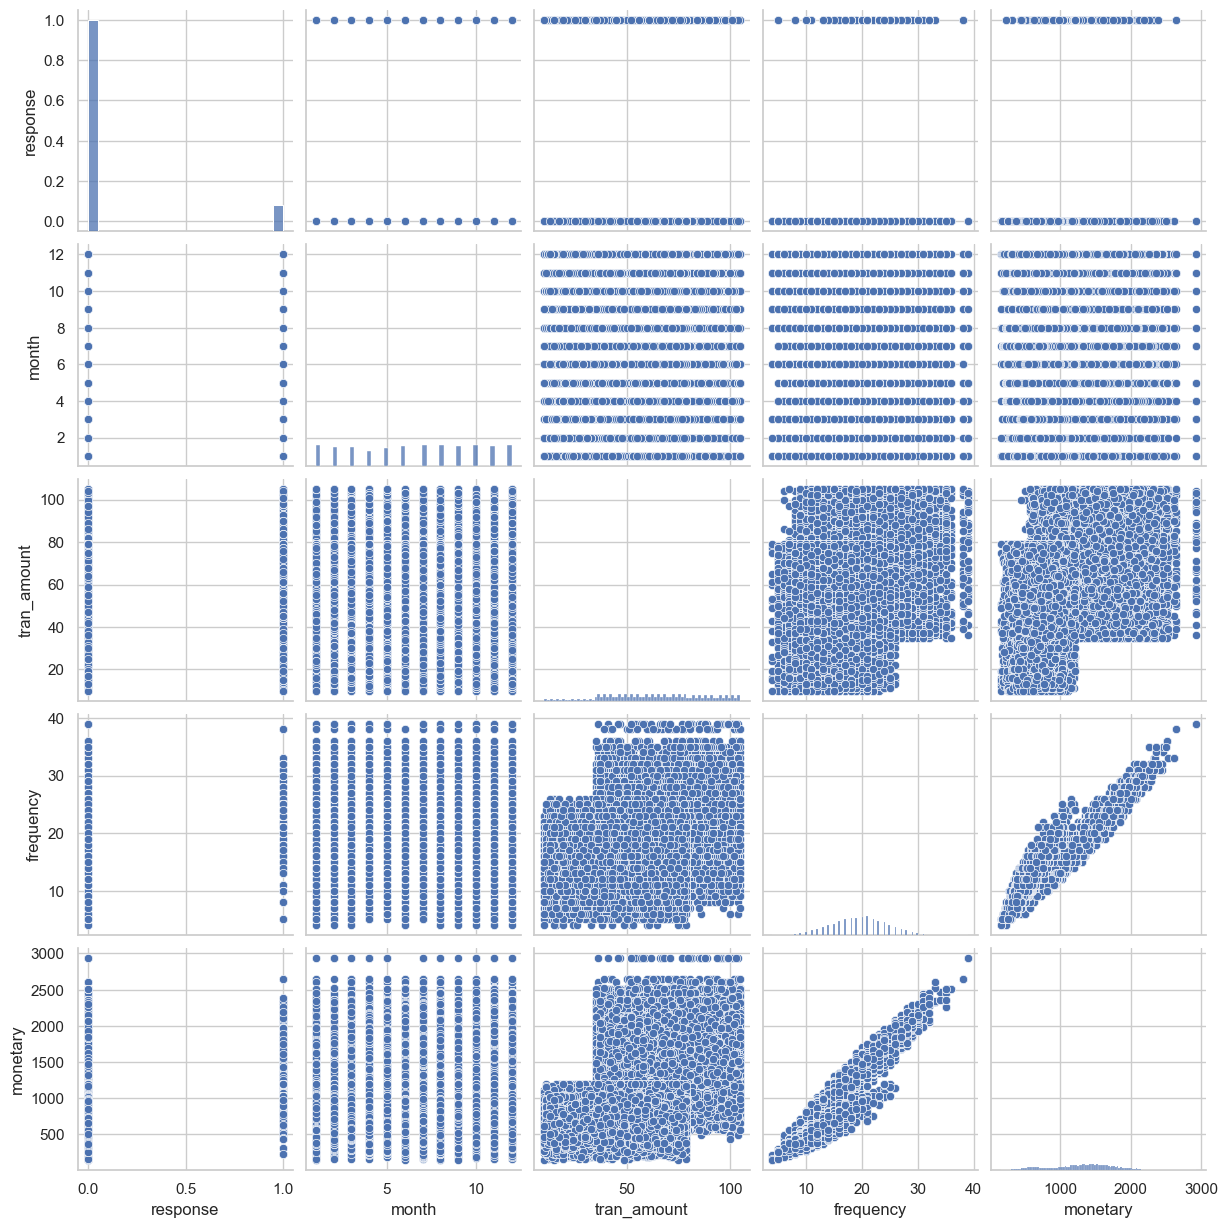

In [161]:
# Pair Plot for the DataFrame

sns.pairplot(df)


plt.show()

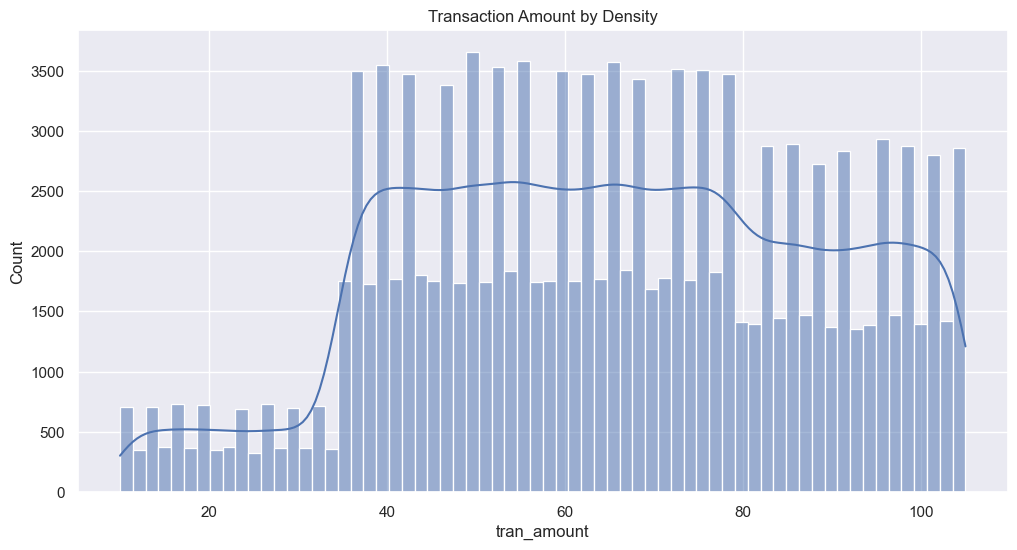

In [162]:
# Distribution Plot for Transaction Amount
sns.set(rc={'figure.figsize':(12, 6)})
sns.histplot(df['tran_amount'], kde=True)
plt.title("Transaction Amount by Density")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3368\4222684315.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




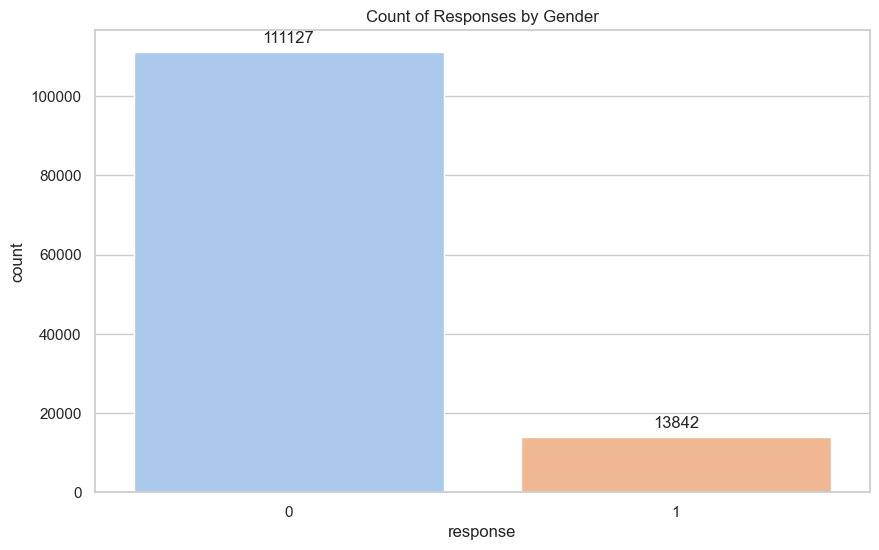

In [163]:
# Bar Plot for Gender Count
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='response', data=df, palette="pastel")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title("Count of Responses by Gender")
plt.show()

In [164]:
# Pie Chart for Monetary Distribution by Segment
monetary_pie = [6498293, 1624085]
segment = ['P0', 'P2']

In [165]:
fig = go.Figure(data=[go.Pie(labels=segment, values=monetary_pie, hole=.3)])
fig.update_layout(title_text="Percentage of Monetary Value in Each Segment")
fig.show()

In [166]:
# Save the DataFrames to CSV
df.to_csv('MainData2.csv', index=False)
rfm.to_csv('AddAnalysis.csv', index=False)

##### Thank you!